# TASK A: GSE65688


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, RFE, VarianceThreshold, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
file_path = "Data/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt"
df = pd.DataFrame()

df = pd.read_csv(file_path, sep='\t', header=0, index_col=0)
df = df.transpose()

# Remove "gene_name" and "gene_type" rows
df = df.drop(["gene_name", "gene_type"])

In [3]:
df

gene_id,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,SPIKE1,SPIKE2,SPIKE3
BC01_Pooled,2.33,0.0,60.7,47.93,4.79,0.0,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14940.7,985.82,0.0
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.0,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.5,0.0
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.0,46.3,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.0,0.0,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.0,5.72,10.0,27.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0


In [4]:
# Load series matrix from CSV file
df_series = pd.DataFrame()
df_series = pd.read_excel("Data/Series_Matrix.xlsx")
# Show count of labels
df_series.value_counts()



GSE75688
2           453
1           110
dtype: int64

In [5]:
# Show count of labels as percentage
df_series.value_counts(normalize = True)*100

GSE75688
2           80.461812
1           19.538188
dtype: float64

In [6]:
# Add new column to df
df['Series Matrix'] = df_series.values
df

gene_id,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,SPIKE1,SPIKE2,SPIKE3,Series Matrix
BC01_Pooled,2.33,0.0,60.7,47.93,4.79,0.0,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,14940.7,985.82,0.0,2
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.0,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.5,0.0,2
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.0,46.3,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0,2
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.0,0.0,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0,2
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.0,5.72,10.0,27.7,...,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0,2
BC11_70,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0,2
BC11_78,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0,2
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0,2


In [7]:
# Exclude the first row and feature all columns except the first and last
X = df.iloc[1:, 1:-1].values 
# Target variable = last column (labels)
y = df.iloc[1:, -1].values  

In [8]:
# Replace NaN values with mean of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [9]:
# Method 1: VarianceThreshold
selector1 = VarianceThreshold()
X_vt = selector1.fit_transform(X)
variance_indices = np.argsort(selector1.variances_)[::-1][:300]
# Print the top 300 ranking for variance
print("Top 300 features using VarianceThreshold:")
print(variance_indices)

Top 300 features using VarianceThreshold:
[57911 22216 39147 22271 18208 22129 22442  3917 39612 22165  7110 18316
 10718 39214 22269 22260 18258  1733 18340  6253  5730 22257  4878 12031
 15270  3815 22273 18216 22440 18308 18310 13475 42759 22890 18238 10526
 22441 11410 29726 11582  7870 17631  5142 57912  9685   398 12679  7460
 12720 22484 20367  5642 22492 39916 42769 10667  9070 22222 30319 16354
 10481 11524  1328   303  6169  3535 12919  5260 14573 57679 11834  6642
   124  8489 18202  4453 10083  6647 13501 26920 17701  4642 22437 47465
 20820  3533 12373 32056 40717  3945 22245 38392  1890 22253  7052 10078
  9340  2076 18280  4173 13731  7331  8140  3604 38692  7391 22443 12725
 23265  3755  3847  1881  3108  1523 32037 18246 45582 22265 38077  9261
  3168 14135 13656  8261 16182  9665  3387 11045  8308  7561  3956 22242
  8494  8023 17946 24315 22445 11532  5734  2333 40069 10438  4031 16180
 10371  6874 12736 31973  8624  9036 15524  1854  7992  5643 10709  1682
  3621  4

In [11]:
# Method 2: SelectKBest with chi-squared test
selector2 = SelectKBest(chi2, k=300)
X_skb = selector2.fit_transform(X, y)
chi2_indices = np.argsort(selector2.scores_)[::-1][:300]
# Print the top 300 ranking for SelectKBest with chi-squared test
print("\nTop 300 features using SelectKBest with chi-squared test:")
print(chi2_indices)



Top 300 features using SelectKBest with chi-squared test:
[57913 43103 43105 43106 43107 43108 43109 43110 43111 43112 43113 43114
 43115 43116 43117 43118 43119 43120 43121 43104 43102 43123 25646 43084
 43085 43086 43087 43088 43089 25648 43091 43092 43093 43094 43095 43096
 25647 43098 43099 43100 43122 43124 43166 25643 43148 43149 43150 43151
 43152 43153 43154 43155 43156 43157 43158 43159 25642 43161 43162 43163
 43164 43147 43145 43125 43143 43126 43127 43128 43129 43130 43131 43132
 43133 43134 43135 43136 43137 43138 43139 25645 43141 43142 43083 43082
 43081 43018 43020 43021 43022 43023 43024 25655 25654 43027 25653 43029
 43030 43031 43032 43033 43034 43035 25652 43019 43017 43080 43016 42999
 43000 43001 43002 43003 43004 43005 43006 43007 43008 43009 43010 43011
 43012 43013 43014 43015 43037 43038 43039 43040 43061 43062 43063 43064
 43065 43066 43067 43068 43069 43070 43071 43072 43074 43075 43076 25649
 43079 43060 43059 43058 25650 43041 43042 43043 43044 43045 4304

In [24]:
# Method 3: Select features using Mutual Information
selector3 = SelectKBest(mutual_info_classif, k=300)
X_mi = selector3.fit_transform(X, y)
mi_indices = np.argsort(selector3.scores_)[::-1][:300]
# Print the top 300 ranking for Select features using Mutual Information
print("\nTop 300 features using Mutual Information:")
print(mi_indices)



Top 300 features using Mutual Information:
[23395  9807 10968  2022  5882 11887  4479   776 26455   103 26741 14359
 33974 16180  6245   459 36121  6859  1769 39833 43970 46196 20536 29167
  9122  6929 18627  3288 18149 51377  9197  5023 39798 31883  7595  8564
  2078  4845 18509  6400  2280 54605 12993 27830 34481 36430  9397 11656
  5015  5038 43409 30373  1084  6596  5692  7752 51011 36810 27827 12487
 10754   514  1252  5133 53814 22940 20541  5354 18701 50029 52264 16318
 26677  8013  5054 21727 50442 44646  7762 31623 33376 50542 10848  6556
 49431 10226 10196  4575 18938 45867 17948 14871  5131  3379  8759 26185
 43341 45328 38477 54333 25040 11088 49508  2548 34768 31377  2026  1766
 52383 19320 16265  9754 23459   430 11413 54394 29613 19640     7 48781
  9128  1220 16354 41595   731  2720 39803  1629 21582   424  1758  5413
 30758  1168  5002 13323 37786 48263 28199 14092 21423 12446 10334 11666
 26999  7690 47057 49901 26292 34729  1341  1194  6558 38390  3556  7389
  6035 

In [25]:
# Method 4: Select features using Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier(n_estimators=5) 
selector4 = RFE(estimator, n_features_to_select=300)
X_rfe = selector4.fit_transform(X, y)
rfe_indices = np.argsort(selector4.ranking_)[:300]
# Print the top 300 ranking for Select features using Mutual Information
print("\nTop 300 features using Recursive Feature Elimination (RFE):")
print(rfe_indices)




Top 300 features using Recursive Feature Elimination (RFE):
[56423 57385 57386 57387 57388 57389 57390 57391 57392 57384 57393 57395
 57396 57397 57398 57399 57400 57401 57402 57394 57403 57383 57381 57362
 57363 57364 57365 57366 57367 57368 57369 57382 57370 57372 57373 57374
 57375 57376 57378 57379 57380 57371 57361 57404 57407 57460 57462 57463
 57474 57479 57480 57481 57504 57459 57514 57548 57573 57582 57588 57605
 57612 57635 57659 57516 57405 57450 57440 57408 57411 57412 57413 57415
 57417 57418 57420 57448 57423 57426 57428 57429 57430 57432 57435 57437
 57438 57425 57666 57360 57358 56502 56500 57295 57299 57300 57301 57302
 57303 56503 57304 57306 57307 57308 57309 57310 57311 57312 57313 57305
 57314 56505 56515 56847 56832 56854 56829 56858 56826 56938 56959 56506
 56653 57012 57036 56628 56574 56532 56522 57176 56519 57002 57359 57315
 57317 57340 57341 57342 57343 57344 57345 57346 57347 57339 57348 57350
 57351 57352 57353 57354 57355 57356 57357 57349 57316 57338 57

In [26]:
def run_knn_with_cv_range_replicates(X, y, feature_range, method_name, replicates=10):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for k in feature_range:
        accuracy_replicates = []
        precision_replicates = []
        recall_replicates = []
        f1_replicates = []
        
        for _ in range(replicates):
            # Define kNN classifier
            knn = KNeighborsClassifier(n_neighbors=3)
            
            # Define 10-fold ross-validation
            cv = KFold(n_splits=10, shuffle=True, random_state=42)
            
            # Select the top k features
            X_subset = X[:, :k]  
            
            # Perform cross-validation and calculate accuracy precision recall and f1 metrics
            accuracy = cross_val_score(knn, X_subset, y, cv=cv, scoring='accuracy').mean()
            precision = cross_val_score(knn, X_subset, y, cv=cv, scoring='precision_macro').mean()
            recall = cross_val_score(knn, X_subset, y, cv=cv, scoring='recall_macro').mean()
            f1 = cross_val_score(knn, X_subset, y, cv=cv, scoring='f1_macro').mean()
            
            # Append the scores on replicate lists
            accuracy_replicates.append(accuracy)
            precision_replicates.append(precision)
            recall_replicates.append(recall)
            f1_replicates.append(f1)
        
        # Append the mean scores across replicates to the main lists
        accuracy_scores.append(accuracy_replicates)
        precision_scores.append(precision_replicates)
        recall_scores.append(recall_replicates)
        f1_scores.append(f1_replicates)
    
    # Print the metrics
    print("Method:", method_name)
    print("Accuracy scores:", accuracy_scores)
    print("Precision scores:", precision_scores)
    print("Recall scores:", recall_scores)
    print("F1-measure scores:", f1_scores)
    
    # Return the evaluation metrics
    return accuracy_scores, precision_scores, recall_scores, f1_scores

feature_range = range(1, 301)

# Perform kNN with cross-validation for each feature selection method, feature range, and replicates
accuracy_var, precision_var, recall_var, f1_var = run_knn_with_cv_range_replicates(X_vt, y, feature_range, "Variance Threshold")
accuracy_kbest, precision_kbest, recall_kbest, f1_kbest = run_knn_with_cv_range_replicates(X_skb, y, feature_range, "SelectKBest")
accuracy_mi, precision_mi, recall_mi, f1_mi = run_knn_with_cv_range_replicates(X_mi, y, feature_range, "Mutual Information")
accuracy_rfe, precision_rfe, recall_rfe, f1_rfe = run_knn_with_cv_range_replicates(X_rfe, y, feature_range, "RFE")


d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

Method: Variance Threshold
Accuracy scores: [[0.8042606516290727, 0.8042606516290727, 0.8042606516290727, 0.8042606516290727, 0.8042606516290727, 0.8042606516290727, 0.8042606516290727, 0.8042606516290727, 0.8042606516290727, 0.8042606516290727], [0.7865601503759398, 0.7865601503759398, 0.7865601503759398, 0.7865601503759398, 0.7865601503759398, 0.7865601503759398, 0.7865601503759398, 0.7865601503759398, 0.7865601503759398, 0.7865601503759398], [0.7635338345864662, 0.7635338345864662, 0.7635338345864662, 0.7635338345864662, 0.7635338345864662, 0.7635338345864662, 0.7635338345864662, 0.7635338345864662, 0.7635338345864662, 0.7635338345864662], [0.7651942355889724, 0.7651942355889724, 0.7651942355889724, 0.7651942355889724, 0.7651942355889724, 0.7651942355889724, 0.7651942355889724, 0.7651942355889724, 0.7651942355889724, 0.7651942355889724], [0.7581140350877194, 0.7581140350877194, 0.7581140350877194, 0.7581140350877194, 0.7581140350877194, 0.7581140350877194, 0.7581140350877194, 0.7581

d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\bioinf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

Method: Mutual Information
Accuracy scores: [[0.7703947368421052, 0.7703947368421052, 0.7703947368421052, 0.7703947368421052, 0.7703947368421052, 0.7703947368421052, 0.7703947368421052, 0.7703947368421052, 0.7703947368421052, 0.7703947368421052], [0.6977443609022557, 0.6977443609022557, 0.6977443609022557, 0.6977443609022557, 0.6977443609022557, 0.6977443609022557, 0.6977443609022557, 0.6977443609022557, 0.6977443609022557, 0.6977443609022557], [0.7615914786967417, 0.7615914786967417, 0.7615914786967417, 0.7615914786967417, 0.7615914786967417, 0.7615914786967417, 0.7615914786967417, 0.7615914786967417, 0.7615914786967417, 0.7615914786967417], [0.7508458646616541, 0.7508458646616541, 0.7508458646616541, 0.7508458646616541, 0.7508458646616541, 0.7508458646616541, 0.7508458646616541, 0.7508458646616541, 0.7508458646616541, 0.7508458646616541], [0.7775689223057645, 0.7775689223057645, 0.7775689223057645, 0.7775689223057645, 0.7775689223057645, 0.7775689223057645, 0.7775689223057645, 0.7775

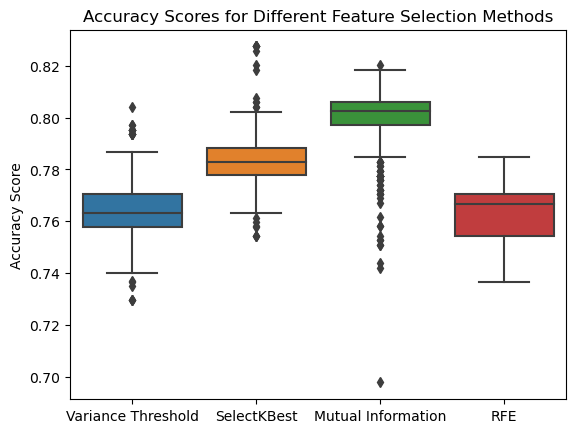

In [39]:
# Pass the accuracy scores from all methods into a DataFrame
accuracy_scores_df = pd.DataFrame({
    'Variance Threshold': np.mean(accuracy_var, axis=1),
    'SelectKBest': np.mean(accuracy_kbest, axis=1),
    'Mutual Information': np.mean(accuracy_mi, axis=1),
    'RFE': np.mean(accuracy_rfe, axis=1)
})

# Plot the boxplot for accuracy
sns.boxplot(data=accuracy_scores_df)
plt.title("Accuracy Scores for Different Feature Selection Methods")
plt.ylabel("Accuracy Score")
plt.show()

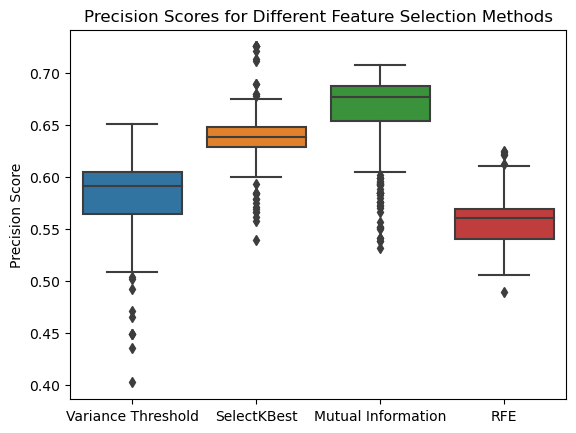

In [35]:
# Precision scores from all methods into a single DataFrame
precision_scores_df = pd.DataFrame({
    'Variance Threshold': np.mean(precision_var, axis=1),
    'SelectKBest': np.mean(precision_kbest, axis=1),
    'Mutual Information': np.mean(precision_mi, axis=1),
    'RFE': np.mean(precision_rfe, axis=1)
})

# Plot the boxplot for precision
sns.boxplot(data=precision_scores_df)
plt.title("Precision Scores for Different Feature Selection Methods")
plt.ylabel("Precision Score")
plt.show()

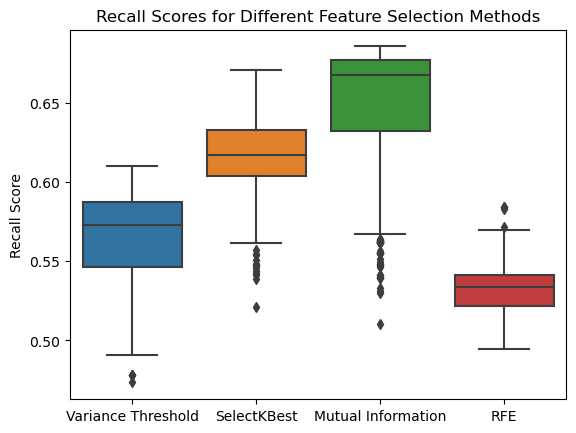

In [36]:
# Recall scores from all methods into a single DataFrame
recall_scores_df = pd.DataFrame({
    'Variance Threshold': np.mean(recall_var, axis=1),
    'SelectKBest': np.mean(recall_kbest, axis=1),
    'Mutual Information': np.mean(recall_mi, axis=1),
    'RFE': np.mean(recall_rfe, axis=1)
})


# Plot the boxplot for recall
sns.boxplot(data=recall_scores_df)
plt.title("Recall Scores for Different Feature Selection Methods")
plt.ylabel("Recall Score")
plt.show()

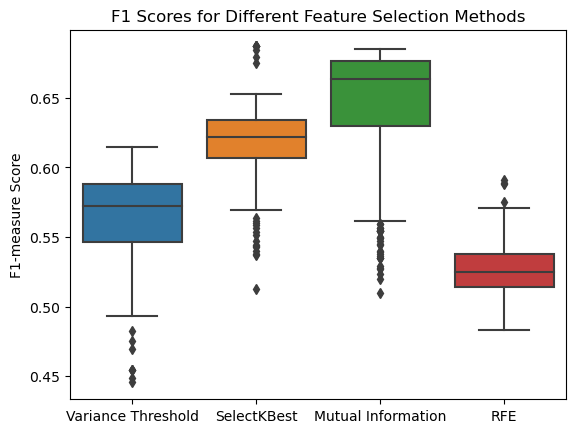

In [38]:
# F1 scores from all methods into a single DataFrame
f1_scores_df = pd.DataFrame({
    'Variance Threshold': np.mean(f1_var, axis=1),
    'SelectKBest': np.mean(f1_kbest, axis=1),
    'Mutual Information': np.mean(f1_mi, axis=1),
    'RFE': np.mean(f1_rfe, axis=1)
})

# Plot the boxplot for F1
sns.boxplot(data=f1_scores_df)
plt.title("F1 Scores for Different Feature Selection Methods")
plt.ylabel("F1-measure Score")
plt.show()

